# Limpieza de datos

La empresa automotriz Autos Jiquilpan tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5). Después de una investigación de mercado intensiva, han deducido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En su mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). Luego, realizaron una comunicación y un acercamiento segmentados para diferentes segmentos de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia en nuevos mercados y han identificado 2627 nuevos clientes potenciales.

Se le pide que ayude al gerente a predecir el grupo correcto de nuevos clientes.

### <font color=red> NOTA: </font><font color=blue>  Explique lo que está realizando y de sus conclusiones sobre los resultados </font>


## Contenido del datset:

ID   ID único <br>
Gender Género <br>
Ever_Married Estado civil del cliente <br>
Age Edad del cliente <br>
Graduated Es graduado? <br>
Profession Profesión <br>
Work_Experience Experiencia laboral en años <br>
Spending_Score Gasto del cliente <br>
Family_Size Tamaño de familia incluido el cliente<br>
Var_1 Categoria del cliente (éste desconoce en que categoria está)<br>
<br><br>




## 1. Vista rápida al dataset


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [7]:
# Importamos nuestro drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [8]:
# Leer archivo csv del dataset
df = pd.read_csv('/gdrive/MyDrive/MachineLearning/DataSciencie/Pandas/Practicas_clase_tech/dataset_clientes.csv')

# Mostramos el dataset
df


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


## 2. Datos duplicados

In [12]:
# Ver datos duplicados
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2622,False
2623,False
2624,False
2625,False


## 3. Datos nulos
Muestre por columnas la cantidad de datos nulos, implemente una estrategia para no dejar ningun dato nulo, no elimine ningún dato.


In [15]:
# Mostrar la cantidad de datos nulos por columna
df.isnull().sum().sum()
print(f"Registros faltantes: {df.isnull().sum().sum()}, Porcentaje: {df.isnull().sum().sum()/len(df) * 100 }")


Registros faltantes: 526, Porcentaje: 20.0228397411496


In [18]:
print(df.isnull().sum())
df.info()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [21]:
# Podemos rellenar los datos nulos con la media y moda de los datos
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


#### Aqui vemos la media, mediana y moda de los datos numeros

In [24]:
# Rellenar valores nulos en columnas numéricas con la media
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)
df['Family_Size'].fillna(df['Family_Size'].mean(), inplace=True)

print(df.isnull().sum())
df.info()

ID                  0
Gender              0
Ever_Married       50
Age                 0
Graduated          24
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              32
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2627 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


<ipython-input-24-f3dbfe12be4d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)
<ipython-input-24-f3dbfe12be4d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

### Aqui ya rellenamos todos lo datos nulos de las columnas numericas con el metodo .fillna() a este metod se le pasa el parametro de la columna a la que se quiere modificar o rellenar mas la funcion .mean que saca la media de la columna el otro parametro es el inplace=True que este realiza la operacion directamente sobre el objeto original no devuelve nuevos objetos ya que el original lo modifica

In [25]:
# Rellenar valores nulos en columnas categóricas con la moda
df['Ever_Married'].fillna(df['Ever_Married'].mode()[0], inplace=True)
df['Graduated'].fillna(df['Graduated'].mode()[0], inplace=True)
df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)
df['Var_1'].fillna(df['Var_1'].mode()[0], inplace=True)

# Ver nuevamente los datos nulos
print(df.isnull().sum())
df.info()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2627 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   object 
 5   Profession       2627 non-null   object 
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


<ipython-input-25-6546f1e065cb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ever_Married'].fillna(df['Ever_Married'].mode()[0], inplace=True)
<ipython-input-25-6546f1e065cb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

### Ya no tenemos ningun dato nulo en ningula columna

## 4. Verifique outlaiers de cada columnas

In [31]:
# Ver los datos de la columna Age
df['Age'].value_counts( bins=10).sort_index()

,count
"(17.927999999999997, 25.1]",327
"(25.1, 32.2]",475
"(32.2, 39.3]",414
"(39.3, 46.4]",430
"(46.4, 53.5]",361
"(53.5, 60.6]",164
"(60.6, 67.7]",159
"(67.7, 74.8]",136
"(74.8, 81.9]",61
"(81.9, 89.0]",100


### Vemos que esta columna no tiene a simple vista datos fuera de lo normal

In [32]:
# Ver datos de la columna Work_Experience
df['Work_Experience'].value_counts( bins=10).sort_index()

,count
"(-0.015, 1.4]",1542
"(1.4, 2.8]",356
"(2.8, 4.2]",175
"(4.2, 5.6]",76
"(5.6, 7.0]",121
"(7.0, 8.4]",149
"(8.4, 9.8]",139
"(9.8, 11.2]",25
"(11.2, 12.6]",12
"(12.6, 14.0]",32


### En esta parte de este columna vemos que hay un numero negativo donde este se puede tomar como un outlaiers

In [38]:
df[ (df['Work_Experience'] > -0.015) & (df['Work_Experience'] < 1.4)]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
2,458996,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2619,467948,Female,No,19,No,Healthcare,0.0,Low,3.0,Cat_6
2620,467949,Male,No,21,No,Healthcare,1.0,Low,4.0,Cat_4
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6


### Creo que no hay ningun valore por debajo a 0 años de experiencia

In [45]:
# Ver datos de la columna Family_Size
df['Family_Size'].value_counts( bins=10).sort_index()

,count
"(0.991, 1.8]",512
"(1.8, 2.6]",768
"(2.6, 3.4]",568
"(3.4, 4.2]",444
"(4.2, 5.0]",200
"(5.0, 5.8]",0
"(5.8, 6.6]",78
"(6.6, 7.4]",26
"(7.4, 8.2]",15
"(8.2, 9.0]",16


### No tiene cuerencia los datos aqui ya que el numero de familia tiene que estar en dato entero no flotante en este sentido no se si tengo que redondiar los numeros o asi dejarlo

## 4.1 Datos numéricos

In [52]:
# Seleccionar columnas numéricas
num_col = ['Age', 'Work_Experience', 'Family_Size']

# Identificar outliers usando IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Mostrar outliers por columna
for column in num_col:
    outliers = detect_outliers_iqr(df[column])
    print(f"Outliers en {column}:")
    print(outliers)
    print(f"Número de outliers en {column}: {len(outliers)}\n")

Outliers en Age:
19      88
30      89
67      89
109     88
137     88
191     88
218     88
390     88
452     89
476     89
589     89
703     89
941     88
2070    89
2394    88
2437    89
2498    89
2548    89
2558    88
Name: Age, dtype: int64
Número de outliers en Age: 19

Outliers en Work_Experience:
1        8.0
3       11.0
13       8.0
18       8.0
24       9.0
        ... 
2604    14.0
2610     8.0
2617     8.0
2622     9.0
2626     9.0
Name: Work_Experience, Length: 357, dtype: float64
Número de outliers en Work_Experience: 357

Outliers en Family_Size:
40      8.0
164     8.0
308     9.0
574     9.0
647     8.0
700     9.0
817     9.0
949     9.0
970     8.0
972     8.0
1037    9.0
1040    8.0
1070    8.0
1079    8.0
1461    8.0
1478    9.0
1612    9.0
1662    9.0
1667    9.0
1682    9.0
1698    9.0
1725    8.0
1726    9.0
1757    9.0
1913    8.0
1915    8.0
2002    8.0
2005    9.0
2516    8.0
2564    9.0
2580    8.0
Name: Family_Size, dtype: float64
Número de outliers en

## 4.2 Datos categóricos

Valores únicos en Gender:
['Female' 'Male']

Valores únicos en Ever_Married:
['Yes' 'No']

Valores únicos en Graduated:
['Yes' 'No']

Valores únicos en Profession:
['Engineer' 'Healthcare' 'Artist' 'Executive' 'Marketing' 'Doctor'
 'Lawyer' 'Entertainment' 'Homemaker']

Valores únicos en Spending_Score:
['Low' 'Average' 'High']

Valores únicos en Var_1:
['Cat_6' 'Cat_4' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']



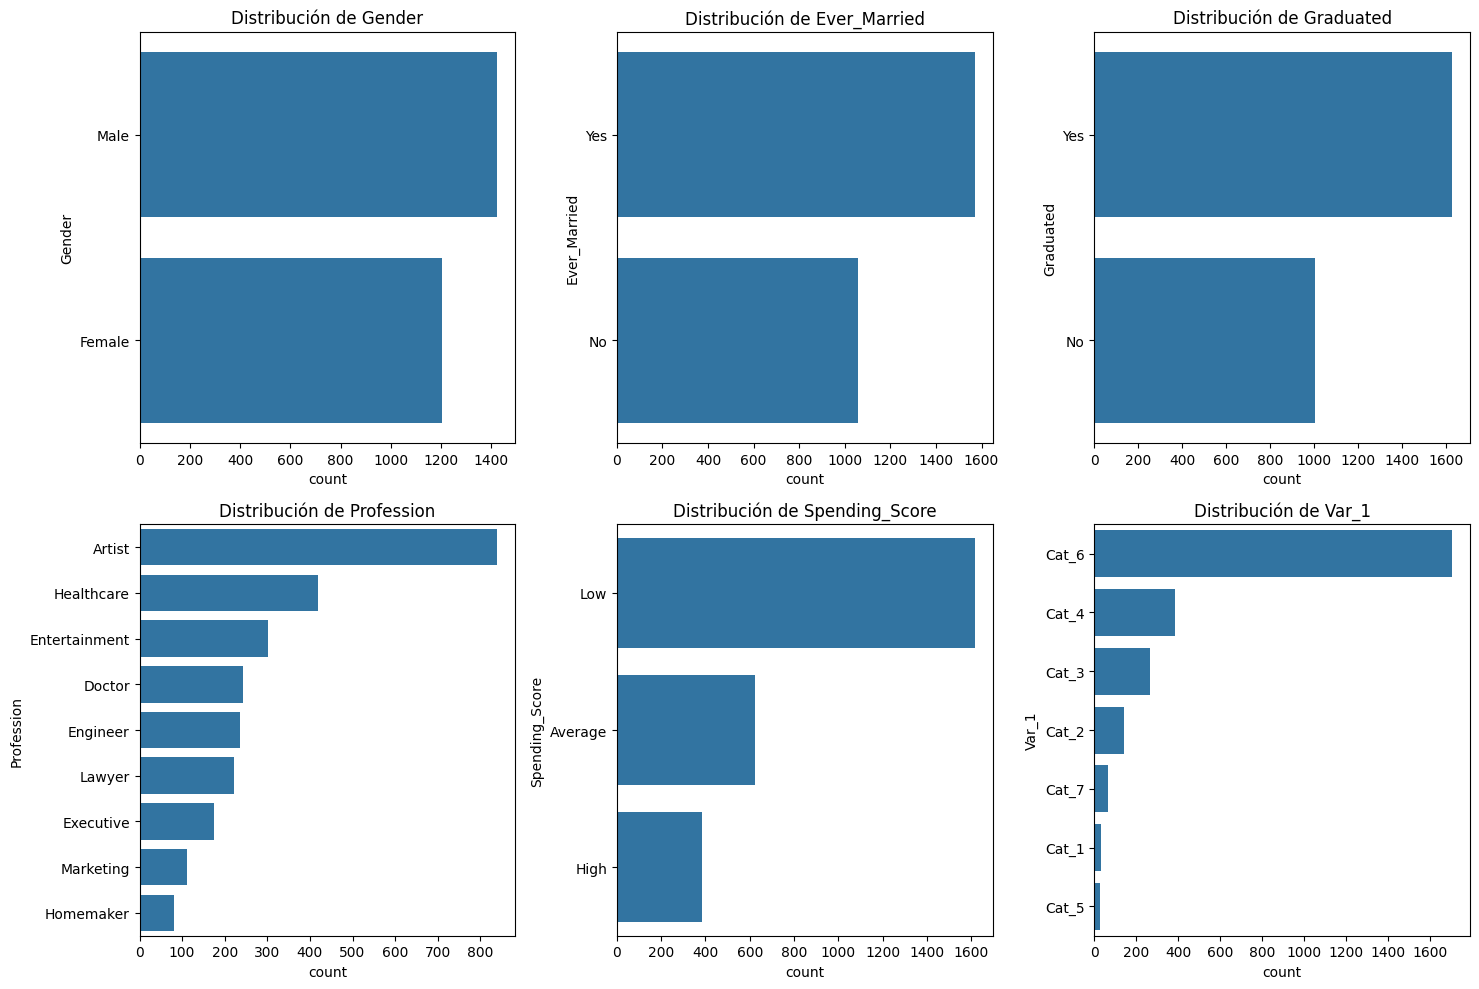

In [55]:
# Verificar valores únicos en columnas categóricas
cate_col = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for column in cate_col:
    print(f"Valores únicos en {column}:")
    print(df[column].unique())
    print()

# Visualizar distribución de categorías
plt.figure(figsize=(15, 10))
for i, column in enumerate(cate_col, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

## 5. Guarde el dateset limpio

In [56]:
df.duplicated().sum()


0

### Ya para finalizar vemos que el set de datos no tiene datos duplicados

In [57]:
df.to_csv("dataset_clientes_clean.csv")

# Como conclusión
##### En este análisis, se llevó a cabo un proceso de limpieza y preparación de datos para el dataset de clientes de la empresa automotriz Autos Jiquilpan.

Se identificaron y manejaron los datos nulos en las columnas categóricas, rellenándolos con valores apropiados como la moda o valores específicos como "Desconocido".

Se verificó la presencia de datos duplicados y se aseguró que no hubiera registros repetidos que pudieran sesgar el análisis.

En las columnas numéricas (Age, Work_Experience, Family_Size), se utilizaron técnicas como boxplots para identificar outliers. Se decidió manejar estos valores atípicos según su impacto en el análisis, pero no hubo la necesidad de modificarlos.

Finalmente, se guardó el dataset limpio y listo para ser utilizado en la segmentación de clientes. Este dataset ahora está libre de valores nulos, duplicados y outliers, lo que garantiza un análisis más preciso y confiable.

